In [1]:
import pulp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Not Solved: Status prior to solving the problem.
#### Optimal: An optimal solution has been found.
#### Infeasible: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).
#### Unbounded: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).
#### Undefined: The optimal solution may exist but may not have been found.

### Prima problema

In [2]:
first_problem = pulp.LpProblem("MyLPProblem", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

# Objective function
first_problem += x1 + 2 * x2, "Z"

# Constraints
first_problem += x1 + x2 <= 3
first_problem += -x1 + x2 <= 1

print(first_problem)

MyLPProblem:
MAXIMIZE
1*x1 + 2*x2 + 0
SUBJECT TO
_C1: x1 + x2 <= 3

_C2: - x1 + x2 <= 1

VARIABLES
x1 Continuous
x2 Continuous



Optimal
x1 = 1.0
x2 = 2.0
5.0


Text(0, 0.5, '$y$')

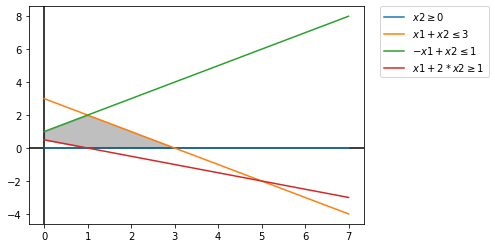

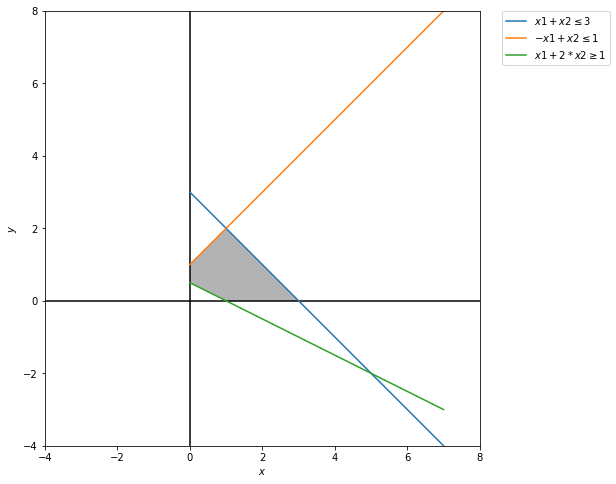

In [3]:
first_problem.solve()
print(pulp.LpStatus[first_problem.status])

if pulp.LpStatus[first_problem.status] == 'Optimal':
    for variable in first_problem.variables():
        print("{} = {}".format(variable.name, variable.varValue))

    print(pulp.value(first_problem.objective))
    
plt.figure()
# Construct lines
# x, y > 0
x = np.linspace(0, 7, 2000)
y1 = (x * 0)
# x1 + x2 <= 3
y2 = (3 - x)
# -x1 + x2 <= 1
y3 = (1 + x)
# x1 + 2 * x2 >= 1
y4 = (1 - x) / 2.0

plt.axvline(0, c='black')
plt.axhline(0, c='black')

plt.plot(x, y1, label=r'$x2\geq0$')
plt.plot(x, y2, label=r'$x1 + x2\leq3$')
plt.plot(x, y3, label=r'$-x1 + x2\leq1$')
plt.plot(x, y4, label=r'$x1 + 2 * x2\geq1$')

# Fill feasible region
y5 = np.minimum(y2, y3)
y6 = np.maximum(y1, y4)

plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




plt.figure(figsize=(8, 8))
# plot the feasible region
d = np.linspace(0, 7, 2000)
x, y = np.meshgrid(d, d)
plt.imshow(((y>=0) & (x + y <= 3) & (-x + y <= 1) & (x + 2 * y >= 1)).astype(int), 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 7, 2000)
# x + y <= 3
y1 = 3 - x
# -x + y <= 1
y2 = 1 + x
# 2y >= 1 - x
y3 = (1 - x) / 2.0

# Make plot
plt.axvline(0, c='black')
plt.axhline(0, c='black')

plt.plot(x, y1, label=r'$x1 + x2\leq3$')
plt.plot(x, y2, label=r'$-x1 + x2\leq1$')
plt.plot(x, y3, label=r'$x1 + 2 * x2\geq1$')
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

### A doua problema (infinit)

In [4]:
second_problem = pulp.LpProblem("MyLPProblem", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

# Objective function
second_problem += x1 + x2, "Z"

# Constraints
second_problem += x1 - x2 >= 0
second_problem += -x1 + 2 * x2 >= 0

print(second_problem)

MyLPProblem:
MAXIMIZE
1*x1 + 1*x2 + 0
SUBJECT TO
_C1: x1 - x2 >= 0

_C2: - x1 + 2 x2 >= 0

VARIABLES
x1 Continuous
x2 Continuous



Unbounded


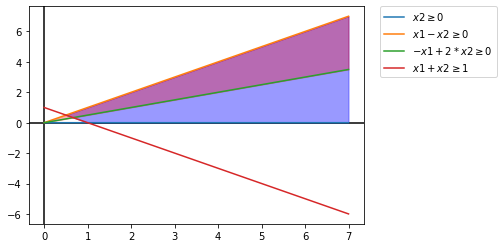

In [12]:
second_problem.solve()
print(pulp.LpStatus[second_problem.status])

if pulp.LpStatus[second_problem.status] == 'Optimal':
    for variable in second_problem.variables():
        print("{} = {}".format(variable.name, variable.varValue))

    print(pulp.value(second_problem.objective))
    
# Construct lines
# x, y > 0
x = np.linspace(0, 7, 2000)
y1 = (x * 0)
# x1 - x2 >= 0
y2 = x
# -x1 + 2 * x2 >= 0
y3 = x / 2.0
# x1 + x2 >= 1
y4 = 1 - x

plt.axvline(0, c='black')
plt.axhline(0, c='black')
    
plt.plot(x, y1, label=r'$x2\geq0$')
plt.plot(x, y2, label=r'$x1 - x2\geq0$')
plt.plot(x, y3, label=r'$-x1 + 2 * x2\geq0$')
plt.plot(x, y4, label=r'$x1 + x2\geq1$')

# Fill feasible region
y5 = np.maximum(y2, y3)
y6 = np.maximum(y1, y4)
y7 = np.minimum(y2, y3)

plt.fill_between(x, y5, y6, where=y6<y5, color='blue', alpha=0.4)
plt.fill_between(x, y5, y7, where=y7<y5, color='red', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

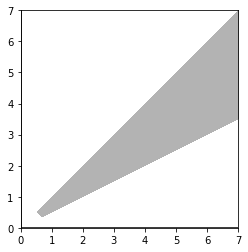

In [6]:
# plot the feasible region
d = np.linspace(0, 7, 2000)
x, y = np.meshgrid(d, d)
plt.imshow( ((y>=0) & (x - y >= 0) & (-x + 2 * y >= 0) & (x + y >= 1)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
# x1 - x2 >= 0
y1 = x
# -x1 + 2 * x2 >= 0
y2 = x / 2.0
# x1 + x2 >= 1
y3 = 1 - x

# Make plot
plt.axvline(0, c='black')
plt.axhline(0, c='black')

# plt.plot(x, y1, label=r'$x1 - x2\geq0$')
# plt.plot(x, y2, label=r'$-x1 + 2 * x2\geq0$')
# plt.plot(x, y3, label=r'$x1 + x2\geq1$')
# plt.xlim(-2, 7)
# plt.ylim(-2, 7)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlabel(r'$x$')
# plt.ylabel(r'$y$')

### A treia problema (nu avem solutii)

In [7]:
third_problem = pulp.LpProblem("MyLPProblem", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

# Objective function
third_problem += x1 + 2 * x2, "Z"

# Constraints
third_problem += x1 + x2 <= 3
third_problem += -x1 + x2 <= 1
third_problem += x1 + x2 >= 4

print(third_problem)

MyLPProblem:
MAXIMIZE
1*x1 + 2*x2 + 0
SUBJECT TO
_C1: x1 + x2 <= 3

_C2: - x1 + x2 <= 1

_C3: x1 + x2 >= 4

VARIABLES
x1 Continuous
x2 Continuous



Infeasible


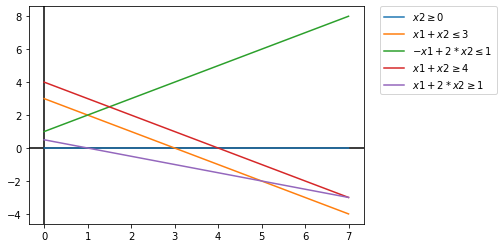

In [8]:
third_problem.solve()
print(pulp.LpStatus[third_problem.status])

if pulp.LpStatus[third_problem.status] == 'Optimal':
    for variable in third_problem.variables():
        print("{} = {}".format(variable.name, variable.varValue))

    print(pulp.value(third_problem.objective))
    
# Construct lines
# x, y > 0
x = np.linspace(0, 7, 2000)
y1 = (x * 0)
# x1 + x2 <= 3
y2 = 3 - x
# -x1 + x2 <= 1
y3 = 1 + x
# x1 + x2 >= 4
y4 = 4 - x
# x1 + 2 * x2 >= 1
y5 = (1 - x) / 2.0

plt.axvline(0, c='black')
plt.axhline(0, c='black')
    
plt.plot(x, y1, label=r'$x2\geq0$')
plt.plot(x, y2, label=r'$x1 + x2\leq3$')
plt.plot(x, y3, label=r'$-x1 + 2 * x2\leq1$')
plt.plot(x, y4, label=r'$x1 + x2\geq4$')
plt.plot(x, y5, label=r'$x1 + 2 * x2\geq1$')

# Fill feasible region
y5 = np.maximum(y3, y5)
y6 = np.maximum(y1, y5)

plt.fill_between(x, y5, y6, where=y6>y5, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### A patra problema ()

In [9]:
fourth_problem = pulp.LpProblem("MyLPProblem", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

# Objective function
fourth_problem += x1 + 2 * x2, "Z"

# Constraints
fourth_problem += x1 + 2 * x2 <= 10
fourth_problem += x1 + x2 >= 1
fourth_problem += x2 <= 4

print(fourth_problem)

MyLPProblem:
MAXIMIZE
1*x1 + 2*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 10

_C2: x1 + x2 >= 1

_C3: x2 <= 4

VARIABLES
x1 Continuous
x2 Continuous



Optimal
x1 = 2.0
x2 = 4.0
10.0


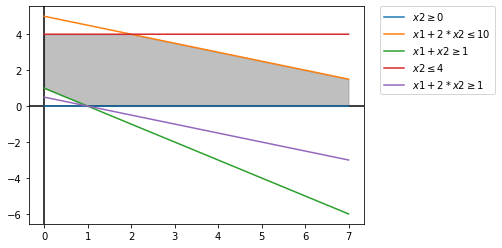

In [10]:
fourth_problem.solve()
print(pulp.LpStatus[fourth_problem.status])

if pulp.LpStatus[fourth_problem.status] == 'Optimal':
    for variable in fourth_problem.variables():
        print("{} = {}".format(variable.name, variable.varValue))

    print(pulp.value(fourth_problem.objective))
    
# Construct lines
# x, y > 0
x = np.linspace(0, 7, 2000)
y1 = (x * 0)
# x1 + 2 * x2 <= 10
y2 = (10 - x) / 2.0
# x1 + x2 >= 1
y3 = 1 - x
# x2 <= 4
y4 = (x * 0) + 4
# x1 + 2 * x2 >= 1
y5 = (1 - x) / 2.0

plt.axvline(0, c='black')
plt.axhline(0, c='black')
    
plt.plot(x, y1, label=r'$x2\geq0$')
plt.plot(x, y2, label=r'$x1 + 2 * x2\leq10$')
plt.plot(x, y3, label=r'$x1 + x2\geq1$')
plt.plot(x, y4, label=r'$x2\leq4$')
plt.plot(x, y5, label=r'$x1 + 2 * x2\geq1$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)

plt.fill_between(x, y5, y6, where=y6<y5, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)